In [12]:
import pandas as pd
import ipywidgets as widgets
import IPython
from IPython import *
from ipywidgets import TwoByTwoLayout, GridspecLayout
import sklearn
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

longitude = widgets.FloatSlider(
    value=-121,
    min=-122,
    max=-120,
    step=0.1,
    description='Longitude:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

latitude = widgets.FloatSlider(
    value=38,
    min=37,
    max=39,
    step=0.1,
    description='Latitude:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

file = open("plot.png", "rb")
image = file.read()
plot_image= widgets.Image(
    value=image,
    format='png',
    width='800',
    height='1000',
)

FileNotFoundError: [Errno 2] No such file or directory: 'plot.png'

In [ ]:
df = pd.read_csv("housing.csv")

In [ ]:
from IPython.display import display, clear_output
button = widgets.Button(description="Predict House Price", align='start')
output = widgets.Output()

def on_button_clicked(b):
    with output:
        columns = ['longitude', 'latitude']
        sample = pd.DataFrame([[longitude.value, latitude.value]],
                        columns = columns )
        location = sc_X.transform(sample)
        rfpredictor = df_rfmodel.predict(location)
        print("The price of the house: ${0:.2f}".format(rfpredictor[0]))
        clear_output(wait=True)

button.on_click(on_button_clicked)

# California House Price Predictor
***
<br>
To use the application below:<br> <br>
1) Move the sliders to the latitude and longitude of the house (use the image as a reference)<br> <br>
2) Next, click the "Predict House Price" button and the estimated house price will be displayed 

<br><br>

In [ ]:
grid = GridspecLayout(10, 2)

grid[:, 1 ] = plot_image
grid[1, 0] = latitude
grid[2, 0] = longitude
grid[4, 0] = button
grid[5, 0] = output

grid

## Cleaning the dataset
***

In [2]:
df = df.drop(["total_bedrooms"], axis = 1)

NameError: name 'df' is not defined

## Building the Machine Learning Model
***

In [3]:
from sklearn.model_selection import train_test_split
y = df.median_house_value
features = ['longitude', 'latitude']
X = df[features]
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

NameError: name 'df' is not defined

## Exploratory Data Analysis
***

In [4]:
from sklearn.linear_model import LinearRegression

df_lrmodel = LinearRegression()
df_lrmodel.fit(X_train, y_train)
# Predicting the Test set results
y_lrpred = df_lrmodel.predict(X_test)

NameError: name 'X_train' is not defined

In [5]:
from sklearn.ensemble import RandomForestRegressor

df_rfmodel = RandomForestRegressor(n_estimators=20, random_state = 0)
df_rfmodel.fit(X_train, y_train)
y_rfpred = df_rfmodel.predict(X_test)

NameError: name 'X_train' is not defined

In [6]:
# Calculate Adjusted R Squared Value
from sklearn import metrics
lr_R = metrics.r2_score(y_test,y_rfpred)
lr_a_R = 1 - (1-lr_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for Linear Regression: ', round(lr_a_R, 3) )

rf_R = metrics.r2_score(y_test,y_rfpred)
rf_a_R = 1 - (1-rf_R)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R Squared Value for Random Forest: ', round(rf_a_R, 3) )

NameError: name 'y_test' is not defined

NameError: name 'df' is not defined

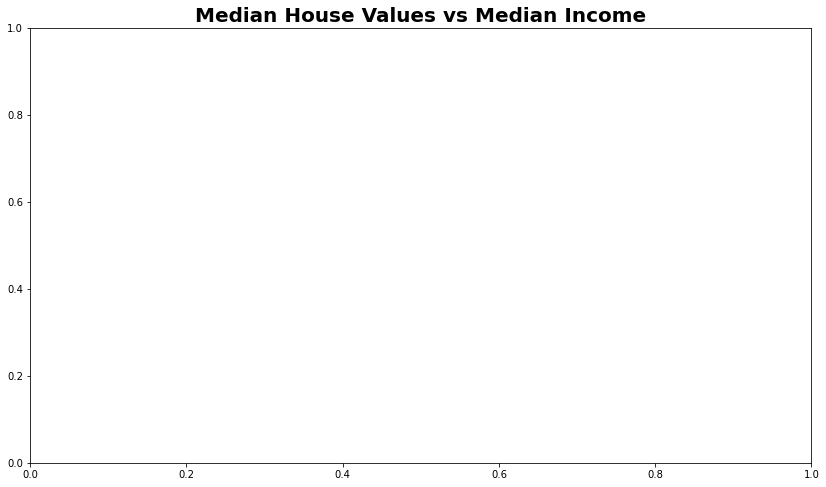

In [7]:
plt.figure(figsize = (14,8))
plt.title("Median House Values vs Median Income", fontsize = 20, fontweight = 'bold')
sns.scatterplot(data = df, y = 'median_house_value', x = 'median_income', alpha = 0.5, color = 'darkgreen')
plt.ylabel("Median House Value (USD)", fontsize = '15')
plt.xlabel("Median Income (Thousand of USD)", fontsize = '15');

## Visualizing the Data

In [8]:
housing = pd.read_csv("housing.csv")
housing.hist(bins=50, figsize=(15,15))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

## Visualizing the highest correlation

In [9]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, figsize=(9,6))

NameError: name 'housing' is not defined

### Correlation matrix of the dataset

In [10]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

NameError: name 'housing' is not defined

In [11]:
## Checking the correlation matrix
corr_mat = housing.corr().round(2)
f, ax = plt.subplots(figsize=(7,7))
mask = np.zeros_like(corr_mat,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
 cmap='RdYlBu',square=False,lw=2,annot=True,cbar=False);
plt.title("Correlation Matrix", fontsize = 18, fontweight = 'bold')
plt.show()

NameError: name 'housing' is not defined